In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

# define some useful variables
FONT_SIZE         = 20
FIG_SIZE          = [15,7]
ARROW_HEAD_LENGTH = 5.
ARROW_HEAD_WIDTH  = 3.

def compute_sinusoid_fft(N,px,py):
    
    kspace = np.zeros((N,N),dtype=np.complex128)
    kspace[px,py] = 1. + 1j
    kspace = np.fft.fftshift( kspace )
    img = np.fft.fft2( kspace / np.sqrt(N*N), norm='ortho' )
    return img

def plot_arrows( Cx, Cy, Nx, Ny, color='r' ):
    '''Display the x and y axes of the image as arrows'''
    plt.arrow( Cx, 0, 0, Ny-1, length_includes_head=True, head_width=ARROW_HEAD_WIDTH, head_length=ARROW_HEAD_LENGTH, fc=color, ec=color, lw=2, ls='-', alpha=1.0 );
    plt.arrow( 0, Cy, Nx-1, 0, length_includes_head=True, head_width=ARROW_HEAD_WIDTH, head_length=ARROW_HEAD_LENGTH, fc=color, ec=color, lw=2, ls='-', alpha=1.0 );

In [2]:
# open the file "openslice.nii"
nii_oneslice = nib.load( './data/oneslice.nii' )
kspace = np.asarray(nii_oneslice.dataobj)

In [3]:
# size of k-space
Nx = kspace.shape[0]
Ny = kspace.shape[1]

# center of k-space
Cx = Nx/2.0
Cy = Ny/2.0

print( f'dimension      = {Nx}x{Ny}' )
print( f'datatype       = {kspace.dtype}' )
print( f'k-space center = [{Cx:.1f}, {Cy:.1f}]' )

dimension      = 112x112
datatype       = complex128
k-space center = [56.0, 56.0]


In [4]:
# resolution = FOV / # voxels
resolution = 220.0 / Nx
print( f'The spatial resolution is {resolution:.2f} mm' )

# frequency = 1/resolution
K_max = 1. / resolution
print( f'which corresponds to a maximum frequency of {K_max:.2f} mm^-1' )

The spatial resolution is 1.96 mm
which corresponds to a maximum frequency of 0.51 mm^-1


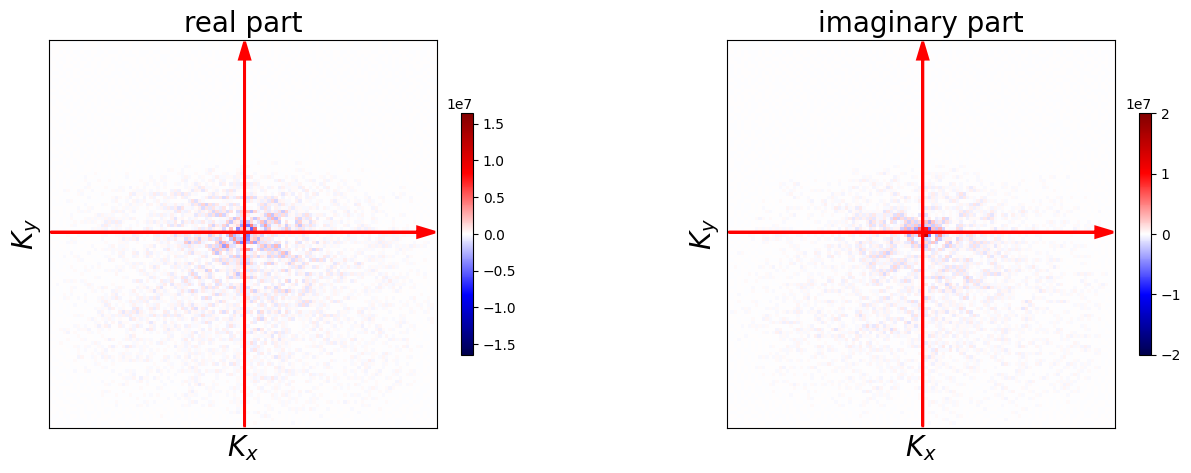

In [5]:
plt.figure( figsize=FIG_SIZE )
plt.subplots_adjust( wspace=0.4 )

# real part
plt.subplot( 121 )
max_val = np.abs(kspace.real).max()
plt.imshow(
    kspace.real, origin='lower',
    cmap='seismic', clim=[-max_val, max_val]
)
plt.colorbar( shrink=0.45 )
plt.tick_params(
    reset=True, axis='both', which='both',
    left=False, right=False, bottom=False, top=False,
    labelbottom=False, labelleft=False
)
plot_arrows( Cx,Cy,Nx,Ny,'r' )
plt.xlabel( '$K_x$', fontsize=FONT_SIZE )
plt.ylabel( '$K_y$', fontsize=FONT_SIZE )
plt.title( 'real part', fontsize=FONT_SIZE )

# imaginary part
plt.subplot( 122 )
max_val = np.abs(kspace.imag).max()
plt.imshow(
    kspace.imag, origin='lower',
    cmap='seismic', clim=[-max_val, max_val]
)
plt.colorbar( shrink=0.45 )
plt.tick_params(
    reset=True, axis='both', which='both',
    left=False, right=False, bottom=False, top=False,
    labelbottom=False, labelleft=False
)
plot_arrows( Cx,Cy,Nx,Ny,'r' )
plt.xlabel ('$K_x$', fontsize=FONT_SIZE )
plt.ylabel ('$K_y$', fontsize=FONT_SIZE )
plt.title( 'imaginary part', fontsize=FONT_SIZE );

In [7]:
magnitude = np.abs(kspace)
phase = np.angle(kspace)

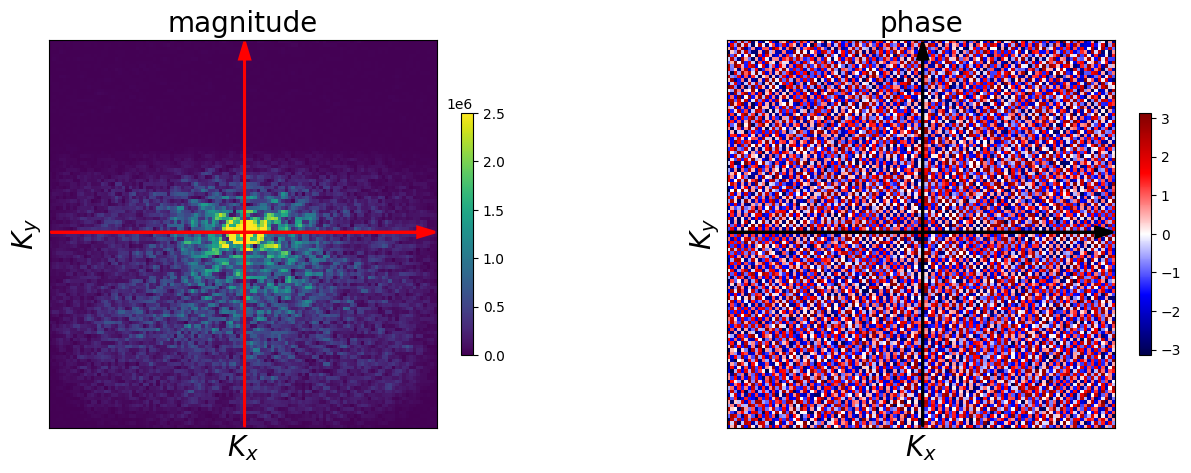

In [8]:
plt.figure( figsize=FIG_SIZE )
plt.subplots_adjust( wspace=0.4 )

# magnitude image
plt.subplot( 121 )
max_val = magnitude.max() / 10.0 # this division is to improve the contrast
plt.imshow(
    magnitude, origin='lower',
    cmap='viridis', clim=[0,max_val]
)
plt.colorbar( shrink=0.45 )
plt.tick_params(
    reset=True, axis='both', which='both',
    left=False, right=False, bottom=False, top=False,
    labelbottom=False, labelleft=False
)
plot_arrows( Cx,Cy,Nx,Ny,'r')
plt.xlabel( '$K_x$', fontsize=FONT_SIZE )
plt.ylabel( '$K_y$', fontsize=FONT_SIZE )
plt.title( 'magnitude', fontsize=FONT_SIZE )

# phase image
plt.subplot( 122 )
plt.imshow(
    phase, origin='lower',
    cmap='seismic', clim=[-np.pi,np.pi]
)
plt.colorbar( shrink=0.45 )
plt.tick_params(
    reset=True, axis='both', which='both',
    left=False, right=False, bottom=False, top=False,
    labelbottom=False, labelleft=False
)
plot_arrows( Cx,Cy,Nx,Ny,'k' )
plt.xlabel( '$K_x$', fontsize=FONT_SIZE )
plt.ylabel( '$K_y$', fontsize=FONT_SIZE )
plt.title(  'phase', fontsize=FONT_SIZE );

In [9]:
kspace_shifted = np.fft.fftshift( kspace )

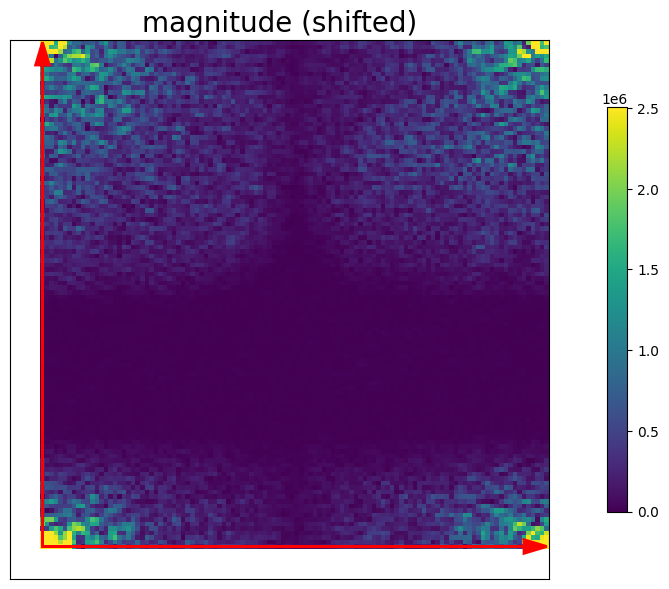

In [10]:
# visualize the shifted k-space
plt.figure( figsize=FIG_SIZE )
plt.imshow(
    np.abs(kspace_shifted), origin='lower',
    cmap='viridis', clim=[0,max_val]
)
plt.colorbar( shrink=0.75 )
plt.tick_params(
    reset=True, axis='both', which='both',
    left=False, right=False, bottom=False, top=False,
    labelbottom=False, labelleft=False
)
plot_arrows( 0,0,Nx,Ny,'r' )
plt.title( 'magnitude (shifted)', fontsize=FONT_SIZE );

In [11]:
img = np.fft.fft2( kspace_shifted / np.sqrt(Nx*Ny), norm='ortho' )

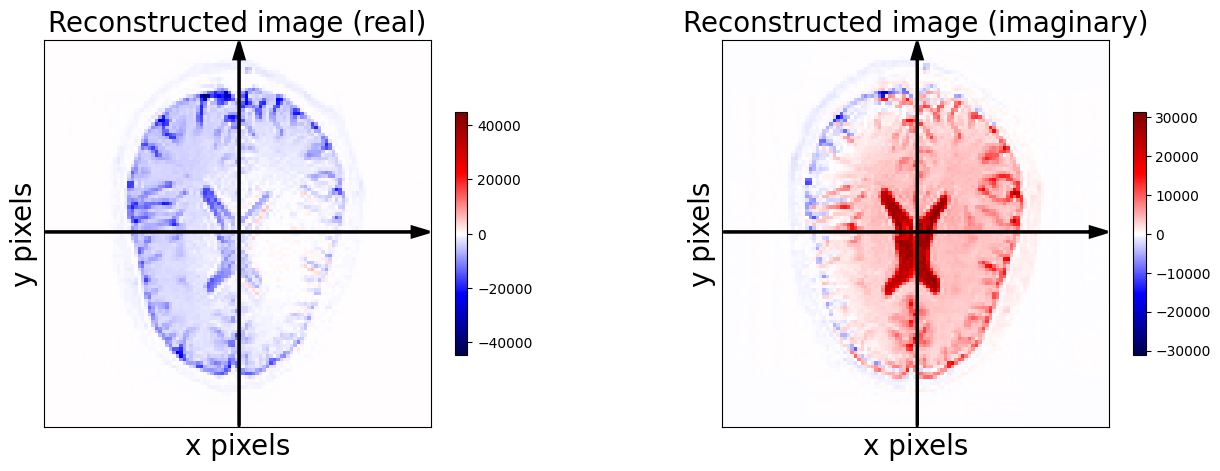

In [12]:
plt.figure( figsize=FIG_SIZE )
plt.subplots_adjust( wspace=0.4 )

# real part
plt.subplot( 121 )
max_val = np.abs(img.real).max()
plt.imshow(
    img.real, origin='lower',
    cmap='seismic', clim=[-max_val,max_val]
)
plt.colorbar( shrink=0.45 )
plt.tick_params(
    reset=True, axis='both', which='both',
    left=False, right=False, bottom=False, top=False,
    labelbottom=False, labelleft=False
)
plot_arrows( Cx,Cy,Nx,Ny,'k' )
plt.xlabel( 'x pixels', fontsize=FONT_SIZE )
plt.ylabel( 'y pixels', fontsize=FONT_SIZE )
plt.title( 'Reconstructed image (real)', fontsize=FONT_SIZE )

# imaginary part
plt.subplot( 122 )
max_val = np.abs(img.imag).max()
plt.imshow(
    img.imag, origin='lower',
    cmap='seismic', clim=[-max_val,max_val]
)
plt.colorbar( shrink=0.45 )
plt.tick_params(
    reset=True, axis='both', which='both',
    left=False, right=False, bottom=False, top=False,
    labelbottom=False, labelleft=False
)
plot_arrows( Cx,Cy,Nx,Ny,'k' )
plt.xlabel( 'x pixels', fontsize=FONT_SIZE )
plt.ylabel( 'y pixels', fontsize=FONT_SIZE );
plt.title(  'Reconstructed image (imaginary)', fontsize=FONT_SIZE );

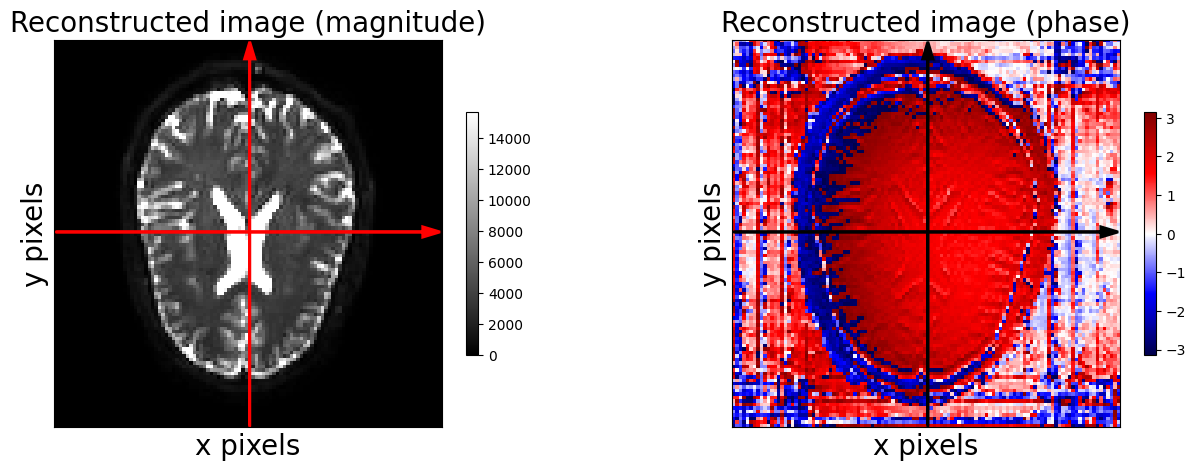

In [13]:
plt.figure( figsize=FIG_SIZE )
plt.subplots_adjust( wspace=0.4 )

# magnitude
plt.subplot( 121 )
max_val = np.abs(img).max() / 3.0 # this division is to improve contrast
plt.imshow(
    np.abs(img), origin='lower',
    cmap='gray', clim=[0,max_val]
)
plt.colorbar( shrink=0.45 )
plt.tick_params(
    reset=True, axis='both', which='both',
    left=False, right=False, bottom=False, top=False,
    labelbottom=False, labelleft=False
)
plot_arrows( Cx,Cy,Nx,Ny,'r' )
plt.title( 'Reconstructed image (magnitude)', fontsize=FONT_SIZE )
plt.xlabel( 'x pixels', fontsize=FONT_SIZE )
plt.ylabel( 'y pixels', fontsize=FONT_SIZE )

# phase
plt.subplot( 122 )
plt.imshow(
    np.angle(img), origin='lower',
    cmap='seismic', clim=[-np.pi,np.pi]
)
plt.colorbar( shrink=0.45 )
plt.tick_params(
    reset=True, axis='both', which='both',
    left=False, right=False, bottom=False, top=False,
    labelbottom=False, labelleft=False
)
plot_arrows( Cx,Cy,Nx,Ny,'k' )
plt.title( 'Reconstructed image (phase)', fontsize=FONT_SIZE )
plt.xlabel( 'x pixels', fontsize=FONT_SIZE )
plt.ylabel( 'y pixels', fontsize=FONT_SIZE );

In [14]:
# Offset of the the selected rectangle (w.r.t. the center of k-space)
OFFSETx = 0
OFFSETy = 0

# Side of the selected rectangle
Kx_half_side = 10
Ky_half_side = 10

# The corresponding pixels coordinates are
x_start = int(Cx) + OFFSETx - Kx_half_side
x_stop  = int(Cx) + OFFSETx + Kx_half_side
y_start = int(Cy) + OFFSETy - Ky_half_side
y_stop  = int(Cy) + OFFSETy + Ky_half_side
print( f'Selected portion of k-space data (w.r.t. center) = [{x_start-int(Cx)},{x_stop-int(Cx)},{y_start-int(Cy)},{y_stop-int(Cy)}]' )


Selected portion of k-space data (w.r.t. center) = [-10,10,-10,10]


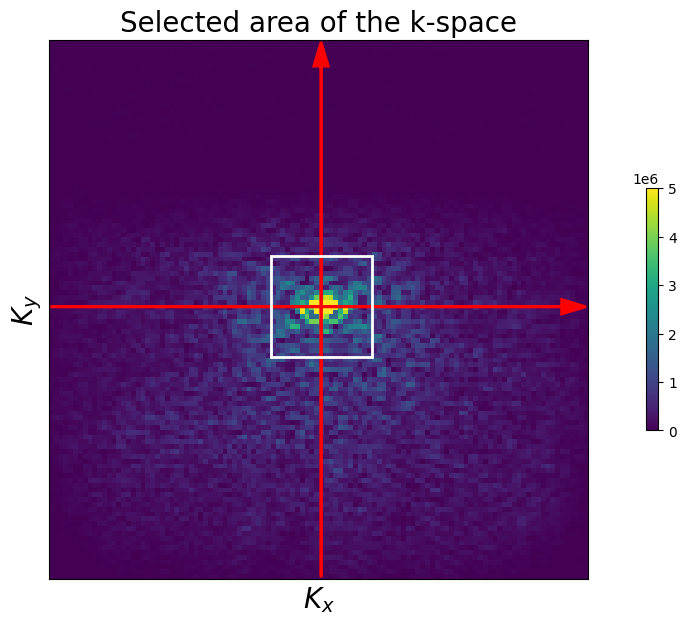

In [15]:
fig = plt.figure( figsize=FIG_SIZE )
max_val = np.abs(kspace).max() / 5.0 # this division is to improve the contrast
plt.imshow(
    np.abs(kspace), origin='lower',
    cmap='viridis', clim=[0,max_val]
)
plt.colorbar( shrink=0.45 )

# box
rect = patches.Rectangle(
    [x_start-0.5, y_start-0.5],
    2*Kx_half_side+1, 2*Ky_half_side+1,
    linewidth=2, edgecolor='w', facecolor='none', zorder=200
)
plt.gca().add_patch( rect )

plt.tick_params(
    reset=True, axis='both', which='both',
    left=False, right=False, bottom=False, top=False,
    labelbottom=False, labelleft=False
)
plot_arrows( Cx,Cy,Nx,Ny,'r' )
plt.xlabel( '$K_x$', fontsize=FONT_SIZE )
plt.ylabel( '$K_y$', fontsize=FONT_SIZE )
plt.title(  'Selected area of the k-space', fontsize=FONT_SIZE );

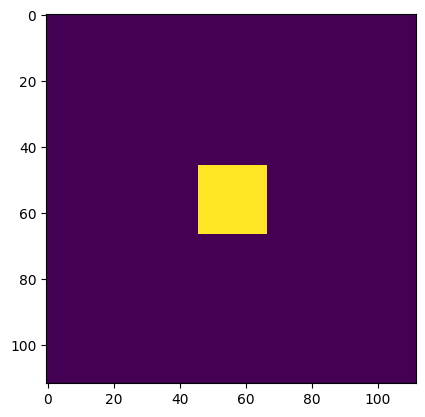

In [16]:
frequency_mask = np.zeros( (Nx,Ny), dtype=bool )
frequency_mask[y_start:y_stop+1,x_start:x_stop+1] = True
plt.imshow(frequency_mask)

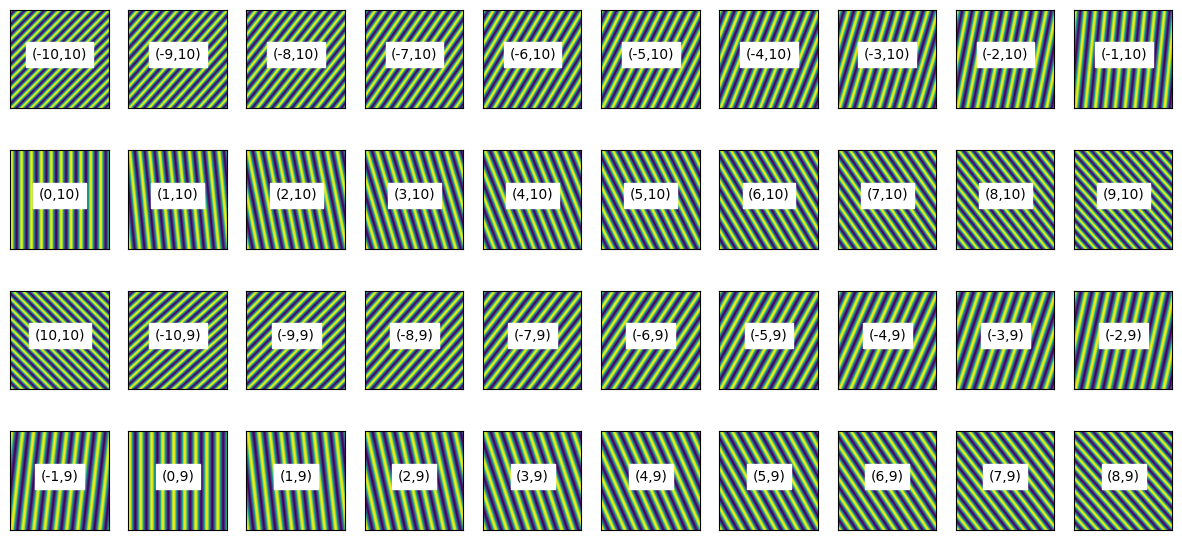

In [17]:
plt.figure( figsize=FIG_SIZE )
image_number = 0
for iy in range(Ny)[::-1]:  # display in reverse order to match previous plot
    for ix in range(Nx):
        if frequency_mask[iy,ix] == True:
            image_number += 1
            if image_number>40:
                break

            K_x = K_max/2. * (ix-Cx)/Cx
            K_y = K_max/2. * (iy-Cy)/Cy
            
            # int(Cx+OFFSETx), int(Cy+OFFSETy)
            sin2D = compute_sinusoid_fft(Nx, int(ix),int(iy) ).real
            
            plt.subplot( 4, 10, image_number )
            plt.imshow( sin2D, origin='lower' )
            plt.tick_params(
                reset=True, axis='both', which='both',
                left=False, right=False, bottom=False, top=False,
                labelbottom=False, labelleft=False
            )
            plt.text(
                Cx, Cy, f'({ix-int(Cx)},{iy-int(Cy)})',
                color='k', backgroundcolor='w', fontsize=10, ha='center'
            );

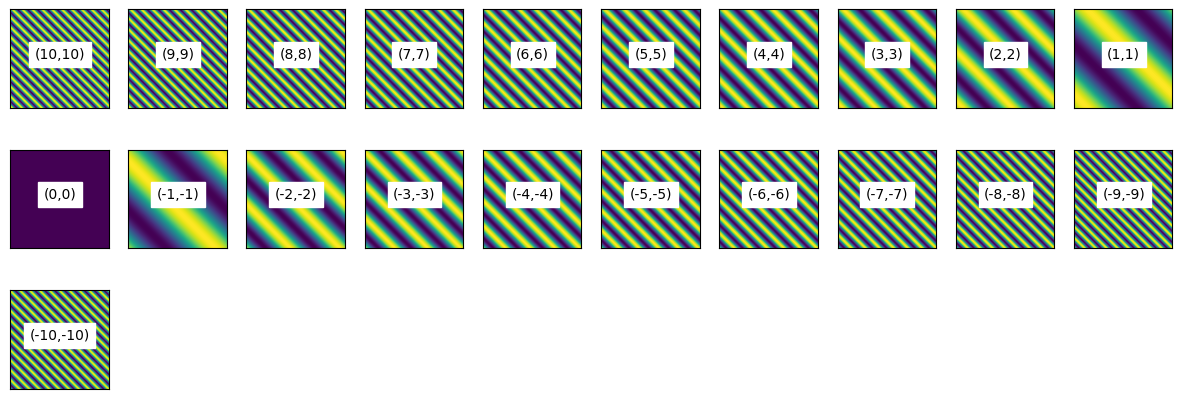

In [18]:
plt.figure( figsize=FIG_SIZE )
image_number = 0
for iy in range(Ny)[::-1]:  # display in reverse order to match previous plot
    for ix in range(Nx):
        
        K_x = K_max/2. * (ix-Cx)/Cx
        K_y = K_max/2. * (iy-Cy)/Cy

        if (frequency_mask[iy,ix] == True) & (K_x==K_y):
            image_number += 1
            if image_number>40:
                break

            
            # sin2D = calculate_sinusoid( (Ny,Nx), K_max,K_max, K_y,K_x )
            sin2D = compute_sinusoid_fft(Nx, int(ix),int(iy) ).real
            
            plt.subplot( 4, 10, image_number )
            plt.imshow( sin2D, origin='lower' )
            plt.tick_params(
                reset=True, axis='both', which='both',
                left=False, right=False, bottom=False, top=False,
                labelbottom=False, labelleft=False
            )
            plt.text(
                Cx, Cy, f'({ix-int(Cx)},{iy-int(Cy)})',
                color='k', backgroundcolor='w', fontsize=10, ha='center'
            );

In [19]:
max_x_freq_in_frame = (Kx_half_side*K_max)/(Nx/2)
max_y_freq_in_frame = (Kx_half_side*K_max)/(Nx/2)

max_freq_in_frame = (max_x_freq_in_frame**2 + max_y_freq_in_frame**2)**0.5

print('the maximum frequency in the selected frame is',max_freq_in_frame,'mm^{-1}')

the maximum frequency in the selected frame is 0.12856486930664504 mm^{-1}


In [20]:
freq_to_visualize = max_freq_in_frame*0.4
tolerance = 0.05

print('We chose to visualize the sinusoids corresponding to a frequency of',freq_to_visualize,'mm^-1 with +/- tolercance',freq_to_visualize*tolerance)

We chose to visualize the sinusoids corresponding to a frequency of 0.051425947722658016 mm^-1 with +/- tolercance 0.002571297386132901


In [21]:
max_accetable_freq = freq_to_visualize+freq_to_visualize*tolerance
min_accetable_freq = freq_to_visualize-freq_to_visualize*tolerance

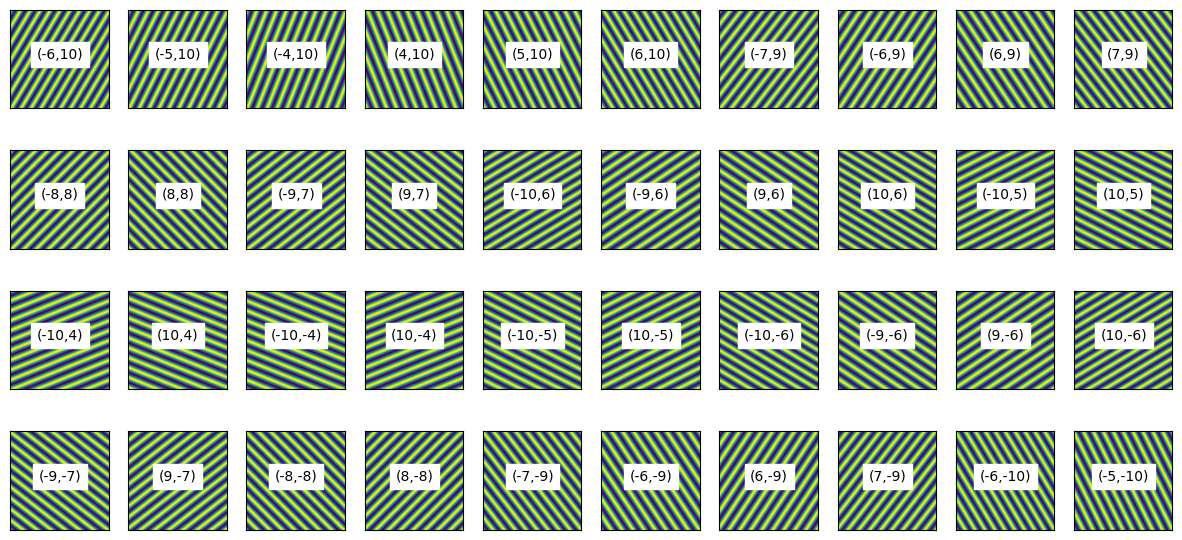

In [22]:
plt.figure( figsize=FIG_SIZE )
image_number = 0
for iy in range(Ny)[::-1]:  # display in reverse order to match previous plot
    for ix in range(Nx):
        
        K_x = K_max/2. * (ix-Cx)/Cx
        K_y = K_max/2. * (iy-Cy)/Cy
        
        # K_x = K_max * (ix-Cx)/Cx
        # K_y = K_max * (iy-Cy)/Cy
        
        # print((K_x**2+K_y**2)**0.5, max_accetable_freq, (K_x**2+K_y**2)**0.5,min_accetable_freq) 
        if (frequency_mask[iy,ix] == True) & (((K_x**2+K_y**2)**0.5 <=max_accetable_freq) & ((K_x**2+K_y**2)**0.5 >=min_accetable_freq) ):
            #print((K_x**2+K_y**2)**0.5, max_accetable_freq, (K_x**2+K_y**2)**0.5,min_accetable_freq)
            image_number += 1
            if image_number>40:
                break

            
            # sin2D = calculate_sinusoid( (Ny,Nx), K_max,K_max, K_y,K_x )
            sin2D = compute_sinusoid_fft(Nx, int(ix),int(iy) ).real
            
            
            plt.subplot( 4, 10, image_number )
            plt.imshow( sin2D, origin='lower' )
            plt.tick_params(
                reset=True, axis='both', which='both',
                left=False, right=False, bottom=False, top=False,
                labelbottom=False, labelleft=False
            )
            plt.text(
                Cx, Cy, f'({ix-int(Cx)},{iy-int(Cy)})',
                color='k', backgroundcolor='w', fontsize=10, ha='center'
            );

In [23]:
# modified k-space
kspace_mod = kspace.copy()
kspace_mod[frequency_mask==0] = 0. + 1j*0.

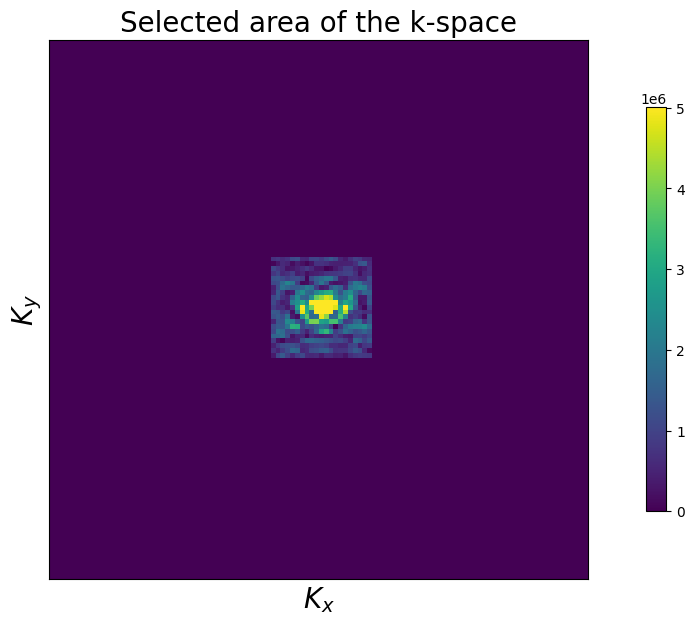

In [24]:
# visualize
fig = plt.figure( figsize=FIG_SIZE )
max_val = np.abs(kspace).max() / 5.0 # this division is to improve the contrast
plt.imshow(
    np.abs(kspace_mod), origin='lower',
    cmap='viridis', clim=[0,max_val]
)
plt.colorbar( shrink=0.75 )
plt.tick_params(
    reset=True, axis='both', which='both',
    left=False, right=False, bottom=False, top=False,
    labelbottom=False, labelleft=False
)
plt.xlabel( '$K_x$', fontsize=FONT_SIZE )
plt.ylabel( '$K_y$', fontsize=FONT_SIZE )
plt.title(  'Selected area of the k-space', fontsize=FONT_SIZE );

In [25]:
# reconstruct from frequencies in the selected portion
kspace_mod_shifted = np.fft.fftshift( kspace_mod )
img_mod = np.fft.fft2( kspace_mod_shifted / np.sqrt(Nx*Ny), norm='ortho' )

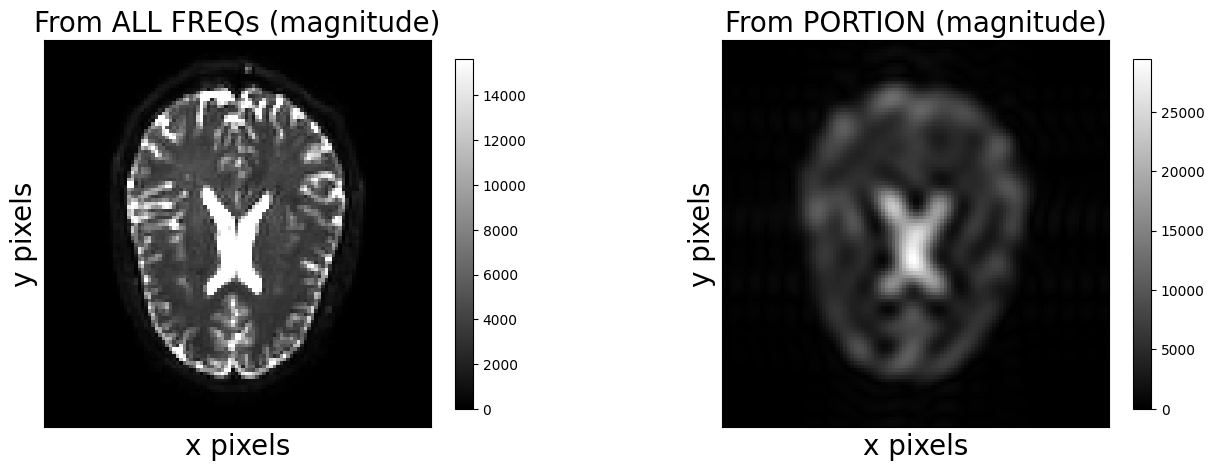

In [26]:
# visualize the original image
plt.figure( figsize=FIG_SIZE )
plt.subplots_adjust( wspace=0.4 )
plt.subplot( 121 )
max_val = np.max(np.abs(img)) / 3.0 # this division is to improve contrast
plt.imshow(
    np.abs(img), origin='lower',
    cmap='gray', clim=[0,max_val]
)
plt.colorbar( shrink=0.65 )
plt.tick_params(
    reset=True, axis='both', which='both',
    left=False, right=False, bottom=False, top=False,
    labelbottom=False, labelleft=False
)
plt.xlabel( 'x pixels', fontsize=FONT_SIZE )
plt.ylabel( 'y pixels', fontsize=FONT_SIZE )
plt.title(  'From ALL FREQs (magnitude)', fontsize=FONT_SIZE )

# visualize the image from fewer frequencies
plt.subplot( 122 )
max_val = np.max(np.abs(img_mod))
plt.imshow(
    np.abs(img_mod), origin='lower',
    cmap='gray', clim=[0,max_val]
)
plt.colorbar( shrink=0.65 )
plt.tick_params(
    reset=True, axis='both', which='both',
    left=False, right=False, bottom=False, top=False,
    labelbottom=False, labelleft=False
)
plt.xlabel( 'x pixels', fontsize=FONT_SIZE )
plt.ylabel( 'y pixels', fontsize=FONT_SIZE )
plt.title(  'From PORTION (magnitude)', fontsize=FONT_SIZE );

In [27]:
# offset w.r.t. the center of k-space
OFFSETx = -25
OFFSETy = 25

# amplitude of the interference
amplification_factor = 1e8

# modified k-space
kspace_mod = kspace.copy()
kspace_mod[int(Cy)+OFFSETy,int(Cx)+OFFSETx] = amplification_factor * (1. + 1j*1)

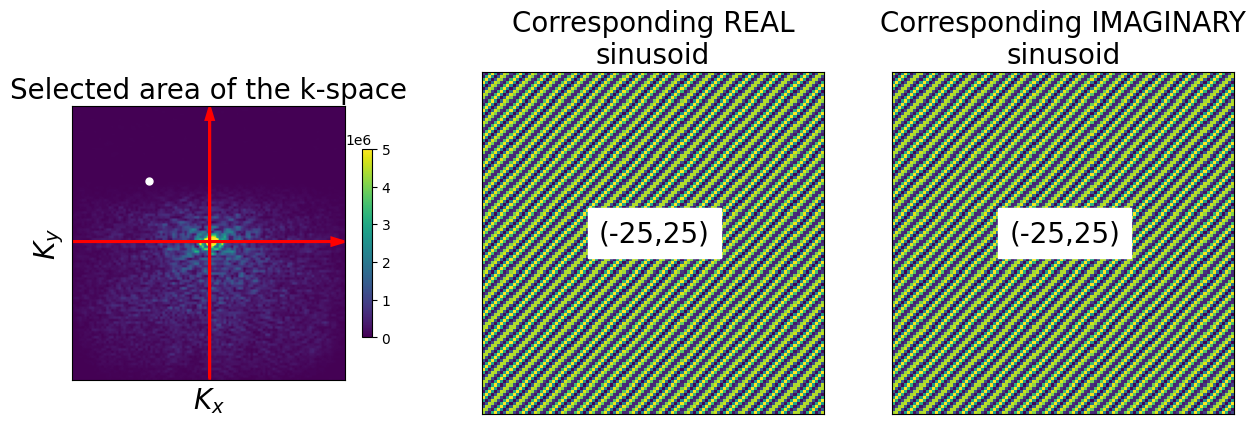

In [28]:
# compute the 2D sinusoid
K_x = K_max/2. *(OFFSETx-Cx)/Cx
K_y = K_max/2. *(OFFSETy-Cy)/Cy

# K_x = K_max *(OFFSETx-Cx)/Cx
# K_y = K_max *(OFFSETy-Cy)/Cy

sin2D = compute_sinusoid_fft(Nx, int(Cy)+OFFSETy,int(Cx)+OFFSETx)


plt.figure( figsize=FIG_SIZE )
plt.subplots_adjust( wspace=0.2 )

# visualize the position in k-space
plt.subplot( 131 )
max_val = np.abs(kspace).max() / 5.0 # this division is to improve the contrast
plt.imshow(
    np.abs(kspace), origin='lower',
    cmap='viridis', clim=[0,max_val]
)
plt.colorbar( shrink=0.35 )
plot_arrows( Cx,Cy,Nx,Ny,'r' )
plt.plot( Cx+OFFSETx, Cy+OFFSETy, 'wo', markersize=5 )
plt.tick_params(
    reset=True, axis='both', which='both',
    left=False, right=False, bottom=False, top=False,
    labelbottom=False, labelleft=False
)
plt.xlabel( '$K_x$', fontsize=FONT_SIZE )
plt.ylabel( '$K_y$', fontsize=FONT_SIZE )
plt.title( 'Selected area of the k-space', fontsize=FONT_SIZE );

# plot the corresponding 2D sinusoid
plt.subplot( 132 )
plt.imshow( sin2D.real, origin='lower' )
plt.tick_params(
    reset=True, axis='both', which='both',
    left=False, right=False, bottom=False, top=False,
    labelbottom=False, labelleft=False
)
plt.text(
    Cx, Cy, f'({OFFSETx},{OFFSETy})',
    color='k', backgroundcolor='w', fontsize=FONT_SIZE, ha='center'
)
plt.title( 'Corresponding REAL\nsinusoid', fontsize=FONT_SIZE );

# plot the corresponding 2D sinusoid
plt.subplot( 133 )
plt.imshow( sin2D.imag, origin='lower' )
plt.tick_params(
    reset=True, axis='both', which='both',
    left=False, right=False, bottom=False, top=False,
    labelbottom=False, labelleft=False
)
plt.text(
    Cx, Cy, f'({OFFSETx},{OFFSETy})',
    color='k', backgroundcolor='w', fontsize=FONT_SIZE, ha='center'
)
plt.title( 'Corresponding IMAGINARY\nsinusoid', fontsize=FONT_SIZE );

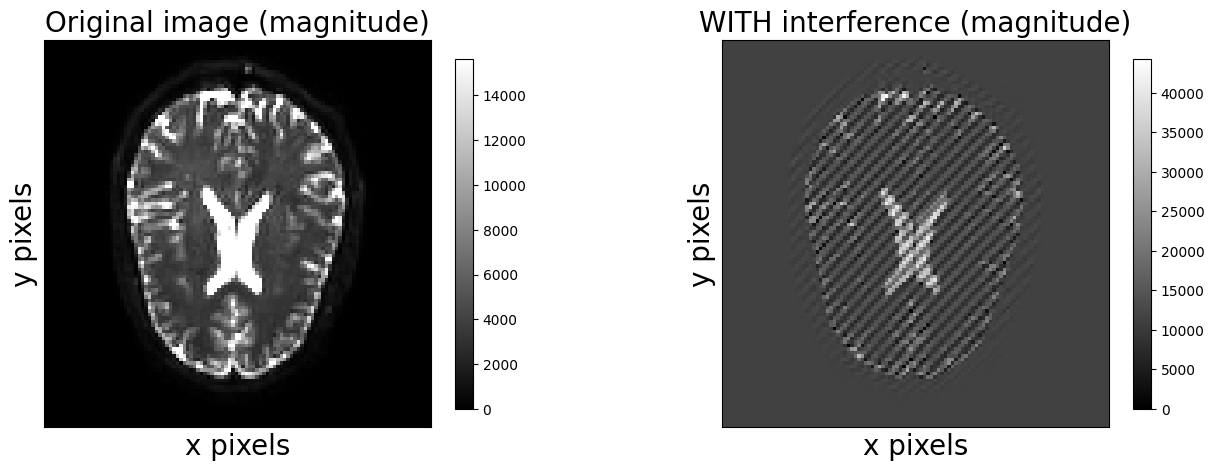

In [29]:
# Reconstruct the image from the modified k-space
kspace_mod_shifted = np.fft.fftshift( kspace_mod )
img_mod = np.fft.fft2( kspace_mod_shifted / np.sqrt(Nx*Ny), norm='ortho' )

# Display and compare
plt.figure( figsize=FIG_SIZE )
plt.subplots_adjust( wspace=0.4 )

plt.subplot(121)
max_val = np.max(np.abs(img)) / 3.0 # this division is to improve contrast
plt.imshow(
    np.abs(img), origin='lower',
    cmap='gray', clim=[0,max_val]
)
plt.colorbar( shrink=0.65 )
plt.tick_params(
    reset=True, axis='both', which='both',
    left=False, right=False, bottom=False, top=False,
    labelbottom=False, labelleft=False
)
plt.xlabel( 'x pixels', fontsize=FONT_SIZE )
plt.ylabel( 'y pixels', fontsize=FONT_SIZE )
plt.title(  'Original image (magnitude)', fontsize=FONT_SIZE )

plt.subplot(122)
max_val = np.max(np.abs(img_mod)) # uncommment to display within its own intensity range
plt.imshow(
    np.abs(img_mod), origin='lower',
    cmap='gray', clim=[0,max_val]
)


plt.colorbar( shrink=0.65 )
plt.tick_params(
    reset=True, axis='both', which='both',
    left=False, right=False, bottom=False, top=False,
    labelbottom=False, labelleft=False
)
plt.xlabel( 'x pixels', fontsize=FONT_SIZE )
plt.ylabel( 'y pixels', fontsize=FONT_SIZE )
plt.title(  'WITH interference (magnitude)', fontsize=FONT_SIZE );

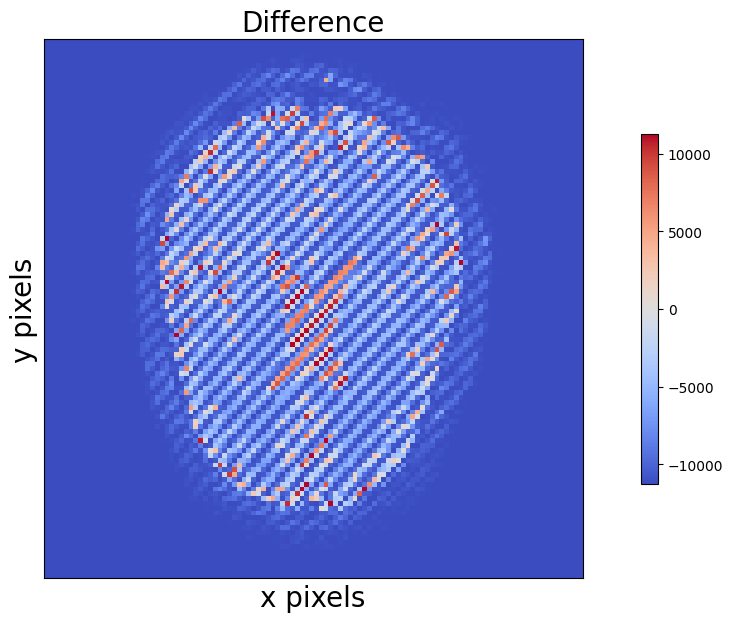

In [30]:
# Compute the actual difference
difference = np.abs(img) - np.abs(img_mod)

plt.figure( figsize=FIG_SIZE )
max_val = np.abs(difference).max() / 1. # this division is to improve contrast
plt.imshow(
    difference, origin='lower',
    cmap='coolwarm', clim=[-max_val,max_val]
)
plt.colorbar( shrink=0.65 )
plt.tick_params(
    reset=True, axis='both', which='both',
    left=False, right=False, bottom=False, top=False,
    labelbottom=False, labelleft=False
)
plt.xlabel( 'x pixels', fontsize=FONT_SIZE )
plt.ylabel( 'y pixels', fontsize=FONT_SIZE )
plt.title(  'Difference', fontsize=FONT_SIZE );